# Notes

- it seems that the TF-DF is going to the right node if the condition is met
    - if value > 3 go to right node
    - vs the others trees .... if value < 3 go to left
        - It's the same thing, but ask from different angle
    

In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [8]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

from dtreeviz.models.tfdf_decision_tree import ShadowTFDFTree

import tensorflow_decision_forests as tfdf
import tensorflow_decision_forests
import pandas as pd

from sklearn.model_selection import train_test_split
from collections import defaultdict

from dtreeviz.trees import *

# Data preprocessing

In [9]:
random_state = 1234
dataset = pd.read_csv("../data/titanic/titanic.csv")
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

In [4]:
dataset[features + [target]]

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label,Survived
0,3,22.000000,7.2500,1,-1,2,0
1,1,38.000000,71.2833,0,81,0,1
2,3,26.000000,7.9250,0,-1,2,1
3,1,35.000000,53.1000,0,55,2,1
4,3,35.000000,8.0500,1,-1,2,0
...,...,...,...,...,...,...,...
886,2,27.000000,13.0000,1,-1,2,0
887,1,19.000000,30.0000,0,30,2,1
888,3,29.699118,23.4500,0,-1,2,0
889,1,26.000000,30.0000,1,60,0,1


# Classification

## Model training

In [5]:
train, test = train_test_split(dataset[features + [target]], train_size=0.7, stratify=dataset.Survived)

In [6]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train, label=target)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test, label=target)

In [7]:
model = tfdf.keras.RandomForestModel(max_depth=3)


Use /var/folders/yp/rczwnkhn6nn9mfcf0bgc61jh0000gn/T/tmphwff8rws as temporary training directory


In [8]:
model.fit(train_ds)


Starting reading the dataset
1/1 [==============================] - ETA: 0s
Dataset read in 0:00:03.483468
Training model
Model trained in 0:00:00.047794
Compiling model
1/1 [==============================] - 4s 4s/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [9]:
model.compile(metrics=["accuracy"])


In [10]:
print(model.evaluate(test_ds))


1/1 [==============================] - 0s 326ms/step - loss: 0.0000e+00 - accuracy: 0.7500
[0.0, 0.75]


## Model metadata discovery

### Prepare for HTML

In [306]:

print(tfdf.model_plotter.plot_model(model, tree_idx=1))


<script src="https://d3js.org/d3.v6.min.js"></script>
<div id="tree_plot_0a120c0fa7d04e6d8495fd9bff8c09f6"></div>
<script>
/*
 * Copyright 2021 Google LLC.
 * Licensed under the Apache License, Version 2.0 (the "License");
 * you may not use this file except in compliance with the License.
 * You may obtain a copy of the License at
 *
 *     https://www.apache.org/licenses/LICENSE-2.0
 *
 * Unless required by applicable law or agreed to in writing, software
 * distributed under the License is distributed on an "AS IS" BASIS,
 * WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
 * See the License for the specific language governing permissions and
 * limitations under the License.
 */

/**
 *  Plotting of decision trees generated by TF-DF.
 *
 *  A tree is a recursive structure of node objects.
 *  A node contains one or more of the following components:
 *
 *    - A value: Representing the output of the node. If the node is not a leaf,
 *      the value is only 

### Model inspector

In [11]:
model.make_inspector()

In [12]:
dir(model.make_inspector())

['MODEL_NAME',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_dataspec',
 '_directory',
 '_header',
 '_make_simple_column_spec',
 '_specialized_header',
 'dataspec',
 'evaluation',
 'export_to_tensorboard',
 'extract_all_trees',
 'extract_tree',
 'features',
 'header',
 'iterate_on_nodes',
 'label',
 'label_classes',
 'metadata',
 'model_type',
 'num_trees',
 'objective',
 'specialized_header',
 'task',
 'training_logs',
 'variable_importances',
 'winner_take_all_inference']

In [13]:
for node in model.make_inspector().iterate_on_nodes():
    if node.tree_idx == 1:
        print(node)
        print(node.tree_idx)
        print("----")

IterNodeResult(node=NonLeafNode(condition=(Sex_label in [1]; miss=False), pos_child=None, neg_child=None, value=ProbabilityValue([0.6035313001605136, 0.39646869983948635],n=623.0)), depth=0, tree_idx=1)
1
----
IterNodeResult(node=NonLeafNode(condition=(Age >= 3.5; miss=True), pos_child=None, neg_child=None, value=ProbabilityValue([0.8054187192118226, 0.19458128078817735],n=406.0)), depth=1, tree_idx=1)
1
----
IterNodeResult(node=LeafNode(value=ProbabilityValue([0.0, 1.0],n=17.0), idx=0), depth=2, tree_idx=1)
1
----
IterNodeResult(node=LeafNode(value=ProbabilityValue([0.8406169665809768, 0.15938303341902313],n=389.0), idx=1), depth=2, tree_idx=1)
1
----
IterNodeResult(node=NonLeafNode(condition=(Pclass >= 2.5; miss=False), pos_child=None, neg_child=None, value=ProbabilityValue([0.22580645161290322, 0.7741935483870968],n=217.0)), depth=1, tree_idx=1)
1
----
IterNodeResult(node=LeafNode(value=ProbabilityValue([0.05172413793103448, 0.9482758620689655],n=116.0), idx=2), depth=2, tree_idx=1)

In [14]:
tree = model.make_inspector().extract_tree(tree_idx=1)

In [15]:
print(tree)

Tree(NonLeafNode(condition=(Sex_label in [1]; miss=False), pos_child=NonLeafNode(condition=(Pclass >= 2.5; miss=False), pos_child=LeafNode(value=ProbabilityValue([0.42574257425742573, 0.5742574257425742],n=101.0), idx=3), neg_child=LeafNode(value=ProbabilityValue([0.05172413793103448, 0.9482758620689655],n=116.0), idx=2), value=ProbabilityValue([0.22580645161290322, 0.7741935483870968],n=217.0)), neg_child=NonLeafNode(condition=(Age >= 3.5; miss=True), pos_child=LeafNode(value=ProbabilityValue([0.8406169665809768, 0.15938303341902313],n=389.0), idx=1), neg_child=LeafNode(value=ProbabilityValue([0.0, 1.0],n=17.0), idx=0), value=ProbabilityValue([0.8054187192118226, 0.19458128078817735],n=406.0)), value=ProbabilityValue([0.6035313001605136, 0.39646869983948635],n=623.0)),label_classes={self.label_classes})


### Save the model

In [21]:
from tensorflow.keras.models import Model

In [22]:
# model.save("/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/testing/testlib/models/fixtures/tfdf_classifier")


In [18]:
import tensorflow

In [19]:
model2 = tensorflow.keras.models.load_model("/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/testing/testlib/models/fixtures/tfdf_classifier_0.2.4")


## dtreeviz - model interpretation

In [23]:
tfdf_shadow = ShadowTFDFTree(model, tree_index=1, 
                             x_data=train[features], 
                             y_data=train[target], 
                             feature_names=features, 
                             target_name=target,
                             class_names=[0, 1])

In [24]:
tfdf_shadow.children_left

defaultdict(<function dtreeviz.models.tfdf_decision_tree.ShadowTFDFTree._get_nodes_info.<locals>.<lambda>()>,
            {0: 1, 1: 2, 4: 5, 2: -1, 3: -1, 5: -1, 6: -1})

# Unit tests
This section was using during development phase and unit testing

In [10]:
from tensorflow_decision_forests.component.inspector import inspector as inspector_lib


In [11]:
random_state = 1234
dataset = pd.read_csv("../testing/testlib/models/fixtures/dataset_spark_tf.csv")
features_clf = ["Pclass","Sex_label","Embarked_label", "Age_mean","SibSp","Parch","Fare"]
target_clf = "Survived"

In [12]:
train_clf = tfdf.keras.pd_dataframe_to_tf_dataset(dataset, label=target_clf)
model_clf = tfdf.keras.RandomForestModel(max_depth=3, random_seed = random_state)
model_clf.fit(train_clf)

Use /var/folders/yp/rczwnkhn6nn9mfcf0bgc61jh0000gn/T/tmp36n386qe as temporary training directory
Starting reading the dataset
1/1 [==============================] - ETA: 0s
Dataset read in 0:00:03.086226
Training model
Model trained in 0:00:00.019425
Compiling model
1/1 [==============================] - 3s 3s/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [13]:
type(train_clf)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [14]:
train_clf._check_dataset

AttributeError: 'PrefetchDataset' object has no attribute '_check_dataset'

## HTML output

In [ ]:
print(tfdf.model_plotter.plot_model(model_clf, tree_idx=0))

## Model metadata

In [15]:
tree_clf = model_clf.make_inspector().extract_tree(tree_idx=0)

In [16]:
dir(tree_clf)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_label_classes',
 '_root',
 'label_classes',
 'root']

In [17]:
tree_clf.root

NonLeafNode(condition=(Sex_label >= 0.5; miss=False), pos_child=NonLeafNode(condition=(Parch >= 2.5; miss=False), pos_child=LeafNode(value=ProbabilityValue([0.875, 0.125],n=16.0), idx=3), neg_child=LeafNode(value=ProbabilityValue([0.18691588785046728, 0.8130841121495327],n=321.0), idx=2), value=ProbabilityValue([0.2195845697329377, 0.7804154302670623],n=337.0)), neg_child=NonLeafNode(condition=(Pclass >= 1.5; miss=True), pos_child=LeafNode(value=ProbabilityValue([0.851528384279476, 0.14847161572052403],n=458.0), idx=1), neg_child=LeafNode(value=ProbabilityValue([0.5729166666666666, 0.4270833333333333],n=96.0), idx=0), value=ProbabilityValue([0.8032490974729242, 0.1967509025270758],n=554.0)), value=ProbabilityValue([0.5824915824915825, 0.4175084175084175],n=891.0))

In [18]:
tree_clf.root.value.probability

[0.5824915824915825, 0.4175084175084175]

In [19]:
np.argmax(tree_clf.root.value.probability)

0

In [20]:
model_clf.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	Age_mean
	Embarked_label
	Fare
	Parch
	Pclass
	Sex_label
	SibSp

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1.        "__LABEL"  1.998889 ################
    2.          "Parch"  1.962222 ###############
    3. "Embarked_label"  1.958889 ###############
    4.          "SibSp"  1.915556 ##############
    5.       "Age_mean"  1.801667 #############
    6.           "Fare"  1.388889 ########
    7.         "Pclass"  1.298889 #######
    8.      "Sex_label"  0.695000 

Variable Importance: NUM_AS_ROOT:
    1.      "Sex_label" 154.000000 ################
    2.         "Pclass" 70.000000 #######
    3.           "Fa

## dtreeviz - tensorflow decision forest

In [25]:
tfdf_shadow = ShadowTFDFTree(model_clf, tree_index=0, 
                             x_data=dataset[features_clf], 
                             y_data=dataset[target_clf], 
                             feature_names=features_clf, 
                             target_name=target_clf,
                             class_names=[0, 1])

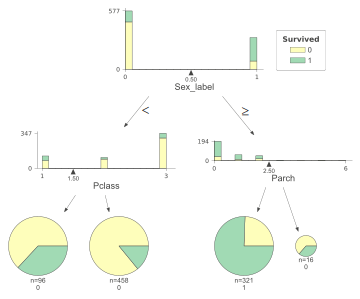

In [26]:
dtreeviz(tfdf_shadow)

In [23]:
isinstance(tfdf_shadow, ShadowDecTree)

True

In [24]:
isinstance(model_clf, tensorflow_decision_forests.keras.RandomForestModel)

True

In [38]:
tfdf_shadow.tree_nodes[0]

NonLeafNode(condition=(Sex_label >= 0.5; miss=False), pos_child=NonLeafNode(condition=(Parch >= 2.5; miss=False), pos_child=LeafNode(value=ProbabilityValue([0.875, 0.125],n=16.0), idx=3), neg_child=LeafNode(value=ProbabilityValue([0.18691588785046728, 0.8130841121495327],n=321.0), idx=2), value=ProbabilityValue([0.2195845697329377, 0.7804154302670623],n=337.0)), neg_child=NonLeafNode(condition=(Pclass >= 1.5; miss=True), pos_child=LeafNode(value=ProbabilityValue([0.851528384279476, 0.14847161572052403],n=458.0), idx=1), neg_child=LeafNode(value=ProbabilityValue([0.5729166666666666, 0.4270833333333333],n=96.0), idx=0), value=ProbabilityValue([0.8032490974729242, 0.1967509025270758],n=554.0)), value=ProbabilityValue([0.5824915824915825, 0.4175084175084175],n=891.0))

In [56]:
for index, node in tfdf_shadow.tree_nodes.items():
    print(f" {index}, {tfdf_shadow.get_prediction(index)}")

 0, 0
 1, 0
 2, 0
 3, 0
 4, 1
 5, 1
 6, 0


In [51]:
tfdf_shadow.get_prediction(0)

[0.5824915824915825, 0.4175084175084175]